In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.shape

(1000, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [7]:
def convert_gen(x):
    a = 0
    if x == 'male':
        a = 1
    return a    

In [8]:
df['gender']  = df['gender'].apply(convert_gen)

In [9]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
dict = {
    "master's degree" : 5,
    "bachelor's degree" : 4,
    "associate's degree" : 3,
    'some college' : 2,
    'high school' : 1,
    'some high school' : 0
}
df['parental level of education'] = df['parental level of education'].map(dict)

In [11]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df['lunch'] = df['lunch'].map({
      'standard' : 1, 'free/reduced' : 0
})

In [13]:
df['test preparation course'] = df['test preparation course'].map({
    'completed' : 1 , 'none' : 0
})

In [14]:
df.drop('race/ethnicity' , axis = 1 , inplace = True)

In [15]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,4,1,0,72,72,74
1,0,2,1,1,69,90,88
2,0,5,1,0,90,95,93
3,1,3,0,0,47,57,44
4,1,2,1,0,76,78,75


In [16]:
cols = ['reading score' , 'writing score']
df[cols].sum()

reading score    69169
writing score    68054
dtype: int64

In [17]:
df[df['math score'] >  100 ]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [18]:
df[df['reading score'] >  100 ]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [19]:
 df[df['writing score'] >  100 ]

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [20]:
df.columns = ["gender" , "pedu" , "lunch" , "test_prep_c" , "math_s" , "reading_s" , "writing_s"]

### ***creating a new cleaned file*** ###

In [21]:
df.to_csv('cleaned.csv' , index = False)

In [22]:
df = pd.read_csv('cleaned.csv')
df.head()

,gender,pedu,lunch,test_prep_c,math_s,reading_s,writing_s
0,0,4,1,0,72,72,74
1,0,2,1,1,69,90,88
2,0,5,1,0,90,95,93
3,1,3,0,0,47,57,44
4,1,2,1,0,76,78,75


# ***Training the model***#

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
import numpy as np

In [73]:
x = np.array(df.drop("math_s" , axis = 1))
y = np.array(df['math_s'].values.reshape(-1,1))
print(x.shape , y.shape)

(1000, 6) (1000, 1)


In [74]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 ,random_state = 42)

In [82]:
scalar = StandardScaler()

In [140]:
polynomial_feature = PolynomialFeatures(degree = 2 )

In [141]:
model = LinearRegression()

In [142]:
pipeline = Pipeline([("Polynomial" , polynomial_feature) , ("Scaling" , scalar) , ("linear" , model)])

In [143]:
pipeline.fit(x_train , y_train)

Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                ('Scaling', StandardScaler()), ('linear', LinearRegression())])

In [144]:
y_pred = pipeline.predict(x_test)

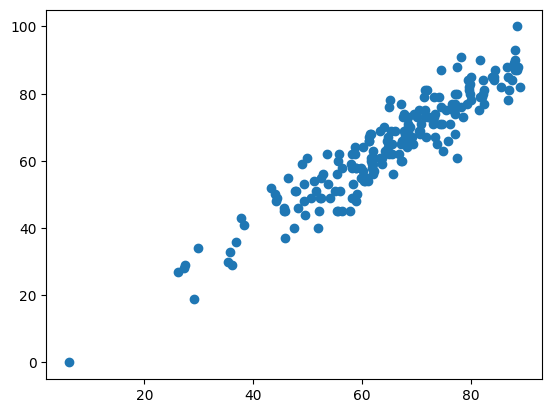

In [145]:
plt.scatter(y_pred , y_test)
plt.show()

### ***prediction -1*** ###

In [149]:
pipeline.predict(
    np.array([
        pd.DataFrame([{
        "gender": 0,
        "pedu": 4,
        "lunch": 1,
        "test_prep_c": 1,
        "reading_s": 80,
        "writing_s": 78
        }])
    ]).reshape(1,-1)
)

array([[69.19460299]])

### ***prediction -2*** ###

In [150]:
pipeline.predict(
    np.array([
        pd.DataFrame([{
         "gender": 0,
         "pedu": 5, 
         "lunch": 1, 
         "test_prep_c": 1, 
         "reading_s": 95, 
         "writing_s": 92
        }])
    ]).reshape(1,-1)
)

array([[84.59993402]])

### ***prediction -3*** ###

In [151]:
pipeline.predict(
    np.array([
        pd.DataFrame([{
       "gender": 1, 
       "pedu": 2,
       "lunch": 1, 
       "test_prep_c": 0,
       "reading_s": 70,
       "writing_s": 68
        }])
    ]).reshape(1,-1)
)

array([[75.17384171]])

### ***prediction -4*** ###

In [152]:
pipeline.predict(
    np.array([
        pd.DataFrame([{
        "gender": 1,
        "pedu": 0, 
        "lunch": 0,
        "test_prep_c": 0, 
        "reading_s": 40, 
        "writing_s": 35
        }])
    ]).reshape(1,-1)
)

array([[43.60782844]])

### ***prediction -5*** ###

In [153]:
pipeline.predict(
    np.array([
        pd.DataFrame([{
        "gender": 0,
        "pedu": 1, 
        "lunch": 0,
        "test_prep_c": 1,
        "reading_s": 78, 
        "writing_s": 76
        }])
    ]).reshape(1,-1)
)

array([[63.95420506]])

In [148]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:\n")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Model Evaluation:

MAE: 4.29
RMSE: 5.45
R² Score: 0.88
